In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt #for plotting bounding boxes
%matplotlib inline
from matplotlib import patches
from skimage import io

sys.path.insert(0, '/content/drive')
os.chdir("/content/drive")


In [0]:
dataset_dir = 'My Drive/FYP Dataset/'
train_dir = dataset_dir + 'train.csv'
test_dir = dataset_dir + 'test.csv'

In [79]:
test = pd.read_csv(test_dir, index_col = False)
test.head()

,FileName,OriginalURL,XMin,XMax,YMin,YMax,ClassName
0,004130acea29204f.jpg,https://requestor-proxy.figure-eight.com/figur...,0.238619,0.481947,0.588358,0.908524,Football
1,01ab4be3f275d44c.jpg,https://requestor-proxy.figure-eight.com/figur...,0.455752,0.538348,0.800885,0.926991,Football
2,01ab4be3f275d44c.jpg,https://requestor-proxy.figure-eight.com/figur...,0.064897,0.153392,0.530973,0.634956,Sportsequipment
3,01ab4be3f275d44c.jpg,https://requestor-proxy.figure-eight.com/figur...,0.367257,0.451327,0.873894,0.935841,Sportsequipment
4,032bac5e2d8d7323.jpg,https://requestor-proxy.figure-eight.com/figur...,0.000000,1.000000,0.000000,0.942982,Person


In [0]:
train = pd.read_csv(train_dir, index_col = False)
train.head()

firsturl = test['OriginalURL'].iloc[0]

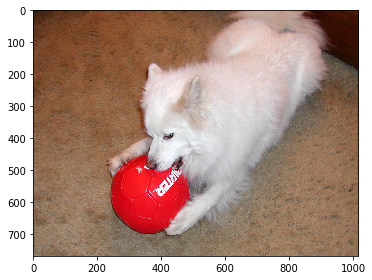

In [123]:
image = io.imread(firsturl)
io.imshow(image)

In [0]:
secondurl = train['OriginalURL'].iloc[0]

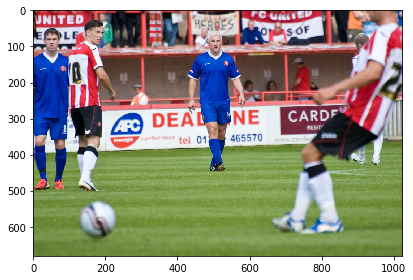

In [12]:
image2 = io.imread(secondurl)
io.imshow(image2)

1017
768


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.get_figure().tight_layout()


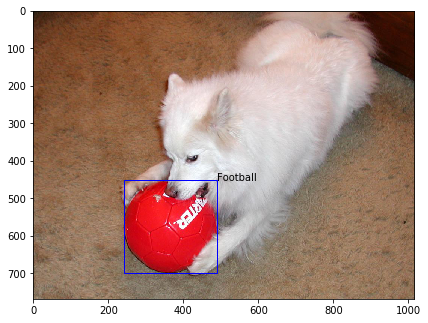

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

img = io.imread(firsturl)
y = img.shape[0]
x = img.shape[1]
print(x)
print(y)
io.imshow(img)

for _, row in test[test.OriginalURL == firsturl].iterrows():
  xmin = float(row.XMin*x)
  xmax = float(row.XMax*x)
  ymin = float(row.YMin*y)
  ymax = float(row.YMax*y)

  width = xmax - xmin
  height = ymax - ymin

  ax.annotate('Football', xy=(xmax,ymin)) #positions where label goes

  rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'b', facecolor = 'none')

  ax.add_patch(rect)